**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [12]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-06-04'

In [13]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA"],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "quarterly"
)

# Summary:

Start date: 2021-06-04
End date: 2023-07-04


,Backtest
,
Annual return,14.81%
Cumulative return,32.53%
Annual volatility,15.87 %
Winning day ratio,54.09%
Sharpe ratio,0.95
Calmar ratio,0.88
Information ratio,0.0
Stability,0.39
Max Drawdown,-16.53 %


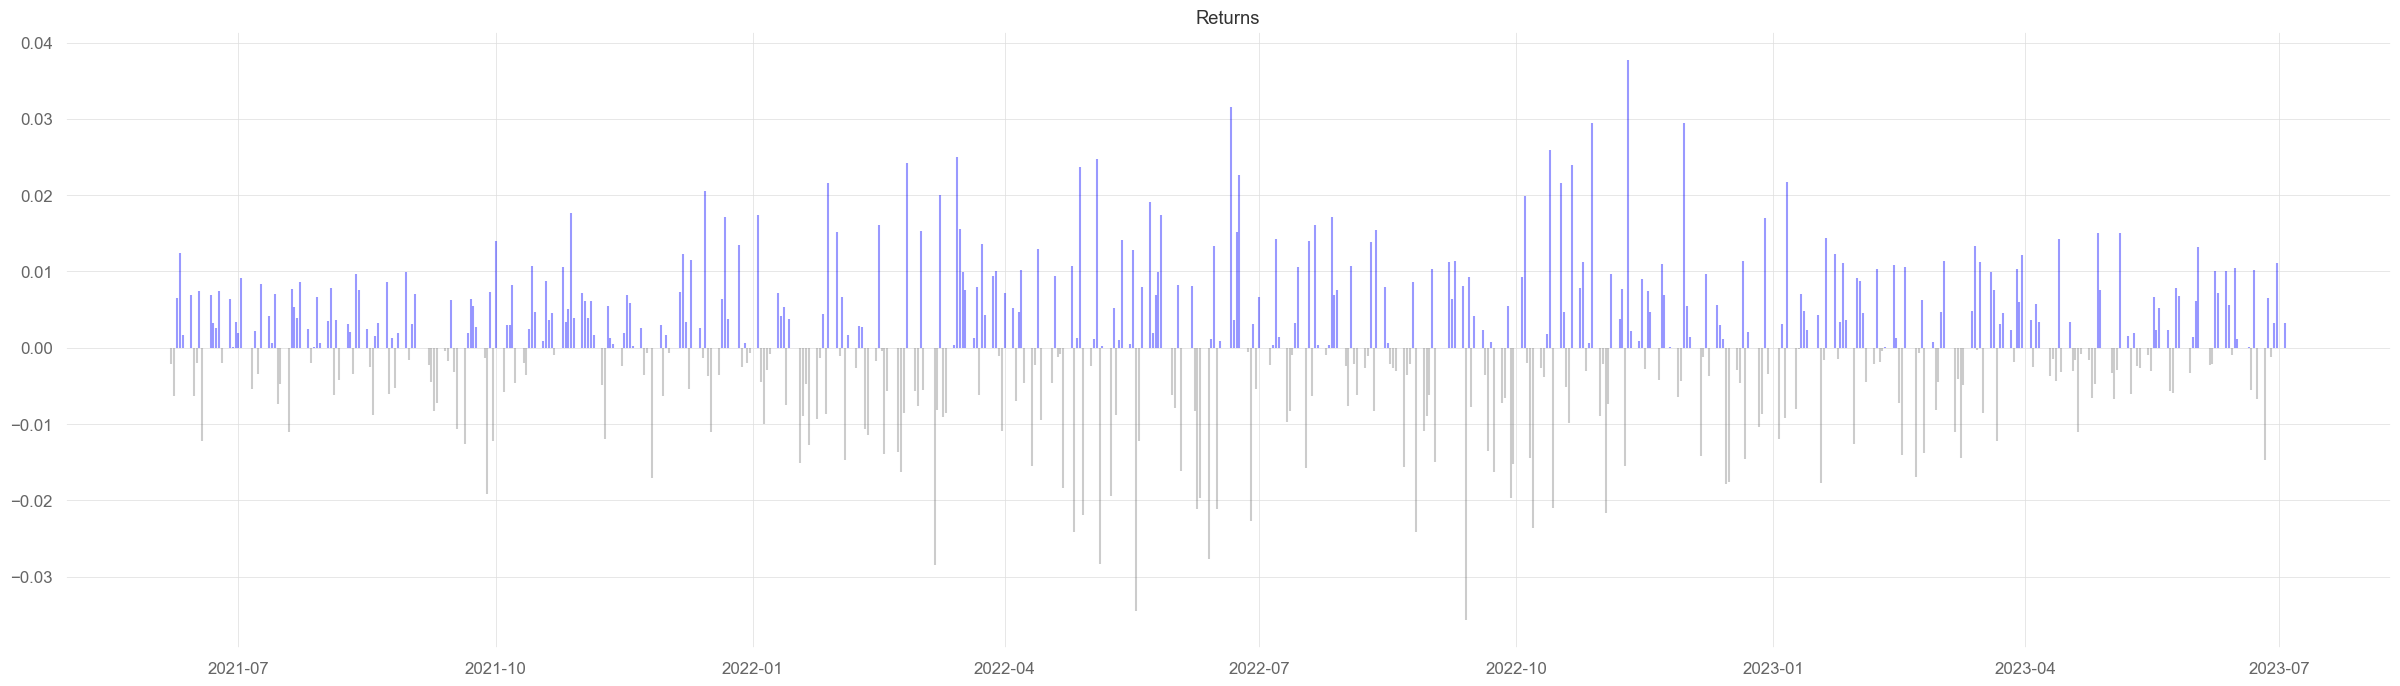

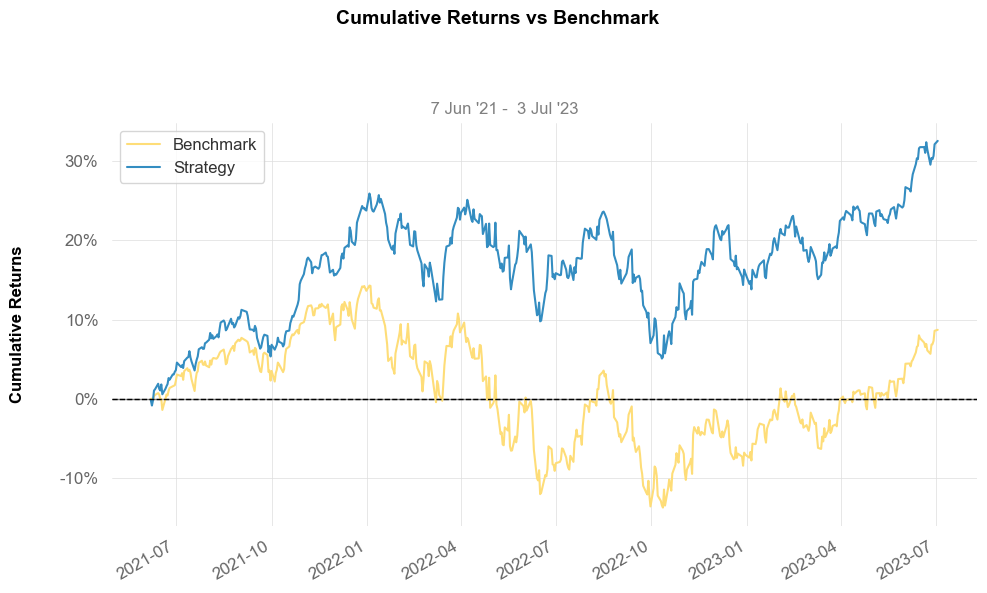

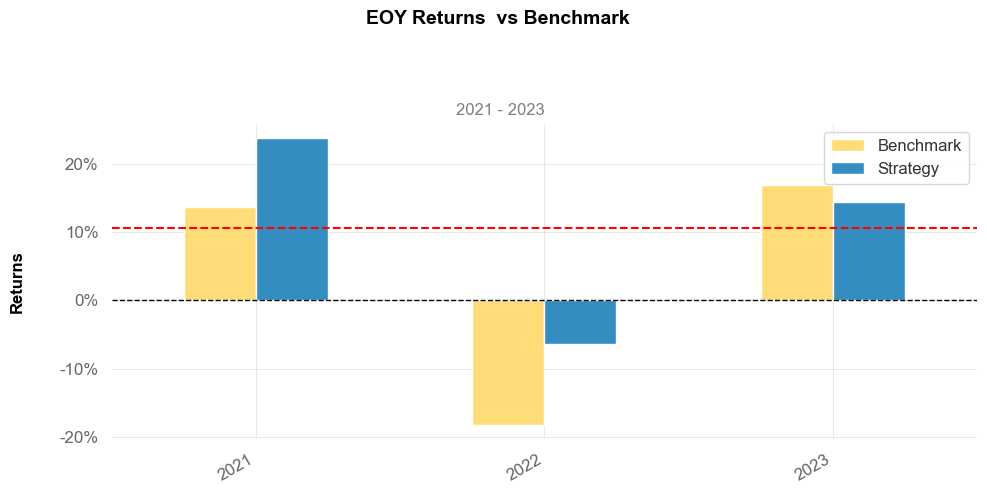

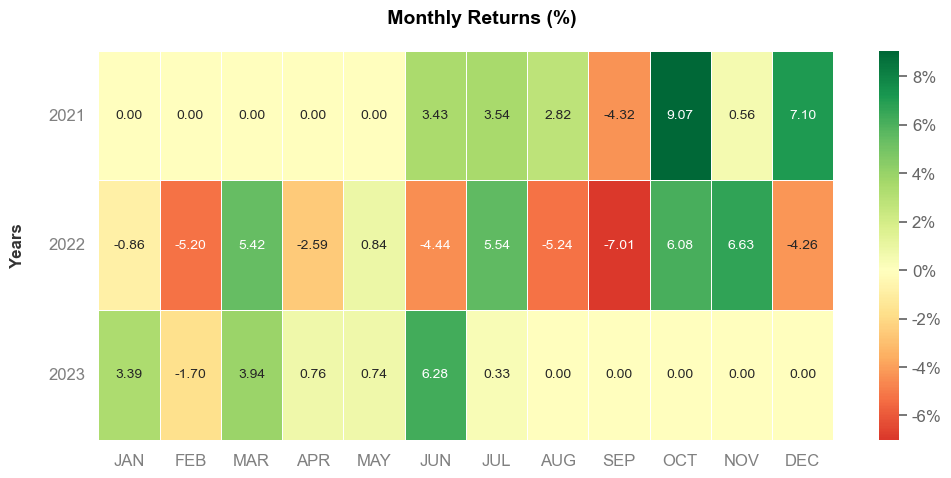

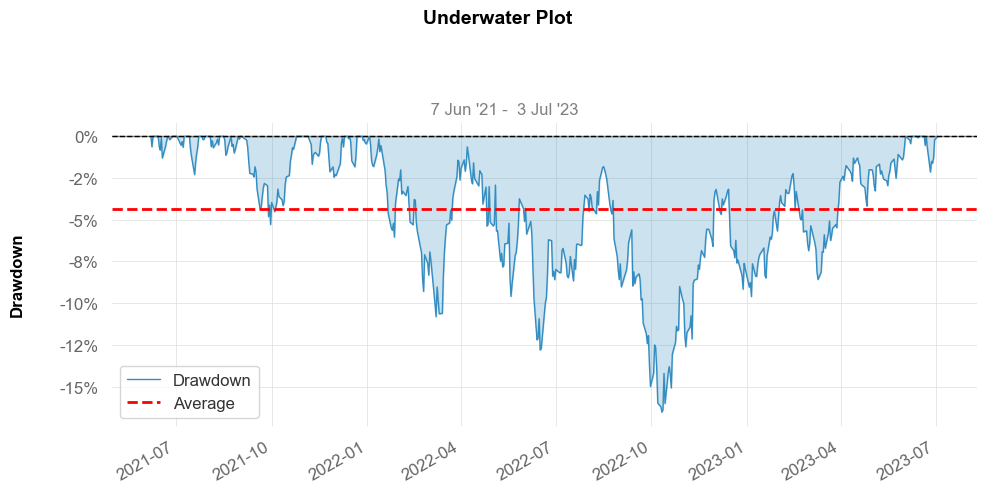

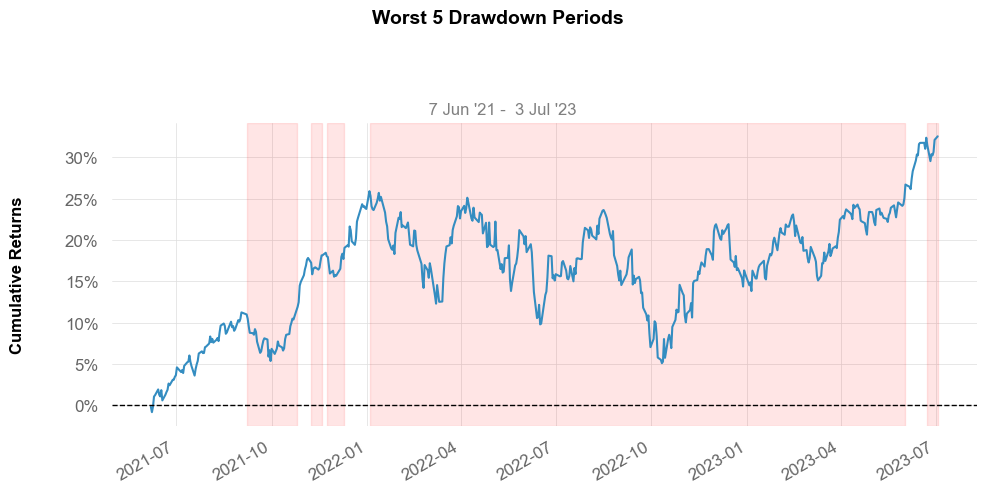

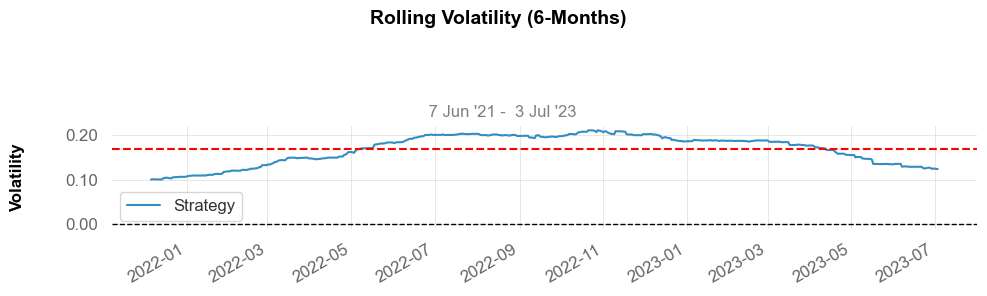

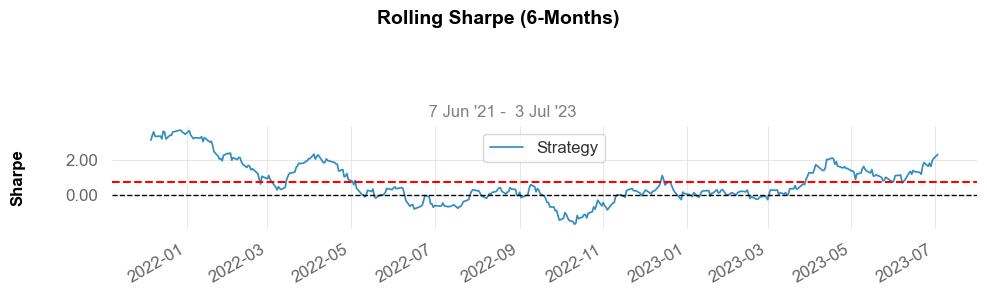

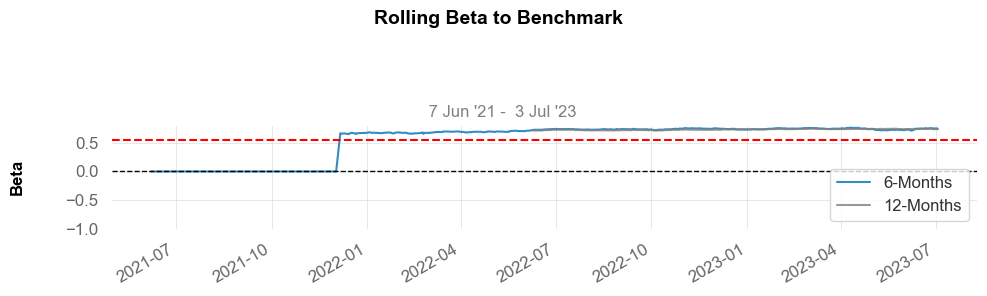

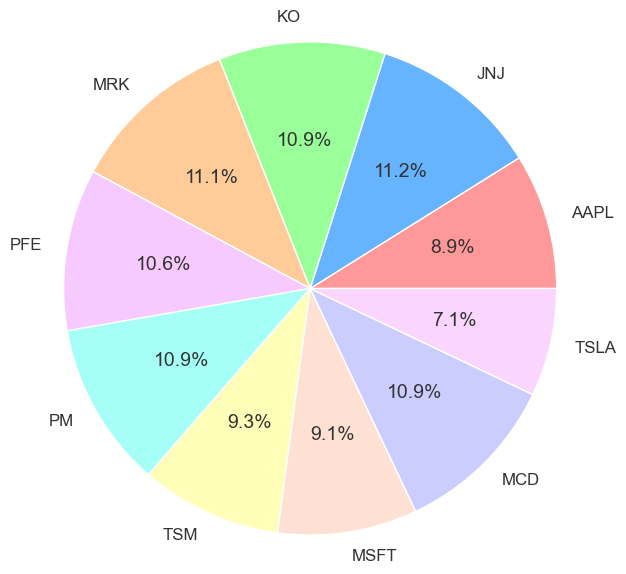

In [14]:
empyrial(portfolio);

# Summary of allocations

In [15]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-09-03,2021-12-03,2022-03-04,2022-06-04,2022-09-03,2022-12-03,2023-03-04,2023-06-04,2023-07-04
AAPL,0.09810,0.09832,0.09517,0.09032,0.08980,0.08689,0.08753,0.08853,0.08894
JNJ,0.10042,0.10265,0.10566,0.11068,0.11153,0.11352,0.11305,0.11220,0.11199
KO,0.10103,0.10194,0.10557,0.10652,0.10829,0.10892,0.10923,0.10905,0.10906
MRK,0.10232,0.09993,0.10391,0.10949,0.10974,0.11235,0.11259,0.11169,0.11142
PFE,0.09751,0.10210,0.10374,0.10760,0.10584,0.10674,0.10653,0.10633,0.10607
PM,0.10117,0.10199,0.10562,0.10883,0.10955,0.10883,0.10905,0.10852,0.10867
TSM,0.09811,0.09860,0.09488,0.09256,0.09321,0.09169,0.09194,0.09259,0.09278
MSFT,0.10027,0.09916,0.09785,0.09420,0.09300,0.09029,0.09040,0.09142,0.09149
MCD,0.10113,0.10214,0.10491,0.10532,0.10704,0.10937,0.10946,0.10893,0.10879
TSLA,0.09995,0.09318,0.08268,0.07448,0.07199,0.07141,0.07022,0.07074,0.07079


In [16]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-07-04
AAPL,0.08894
JNJ,0.11199
KO,0.10906
MRK,0.11142
PFE,0.10607
PM,0.10867
TSM,0.09278
MSFT,0.09149
MCD,0.10879
TSLA,0.07079


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )